In [1]:
import util
from util import *

In [2]:
#name='LiH_1000'
#name='H4_1000'
#name='C_5000'
name='N2_10000'

system=name.split('_')[0]
logdir='vmcdata/logs2/{}'.format(name)
evaldir=logdir

runs={r:cleanlabel(util.getconfig(logdir,r)['notes']) for r in os.listdir(logdir)}
ref=util.reference_energies[system]

allrefs={r:e for r,e in util.reference_energies.items() if system in r}

runs=filter_runs(runs,[('prox','kfac')])

runs

{'kfac_0.05': 'N2 kfac 0.05 ', 'proxsr_0.005': 'N2 proxsr 0.005 '}

In [3]:
k=1000

def extrapolate(std):

    for r,n in runs.items():
        c=get_optimizer_color(n)
        try:
            energies=getenergies(logdir,r)
            variances=getvariances(logdir,r)
            T=len(energies)
            
            print(len(energies))
            print(len(variances))
            
            energies=[np.mean(energies[t:t+k]) for t in range(0,T,k)]
            variances=[np.mean(variances[t:t+k])+variance(energies[t:t+k]) for t in range(0,T,k)]
    
            energies=np.array(energies)
            variances=np.array(variances)
    
            if std:
                variances=np.sqrt(variances)
            
            plt.scatter(variances,energies,color=c,label=n)
    
            a, b = np.polyfit(variances, energies, 1)
            x=np.array([0,np.max(variances)])
            plt.plot(x, a*x+b, ls=':', color=c)
        
        except Exception as e:
            print('skip',r,n,e)

    for refname,ref in allrefs.items():
        plt.axhline(ref,ls=':',label='reference '+refname)
        plt.xlim(left=0)
    plt.legend()
    
    plt.title(name+' extrapolation')
    if std:
        xlabel='Standard deviation'
    else:
        xlabel='Variance'
    
    plt.xlabel(xlabel)
    savefig('plots/extrapolation/'+name+'_'+xlabel)

100000
100000
100000
100000


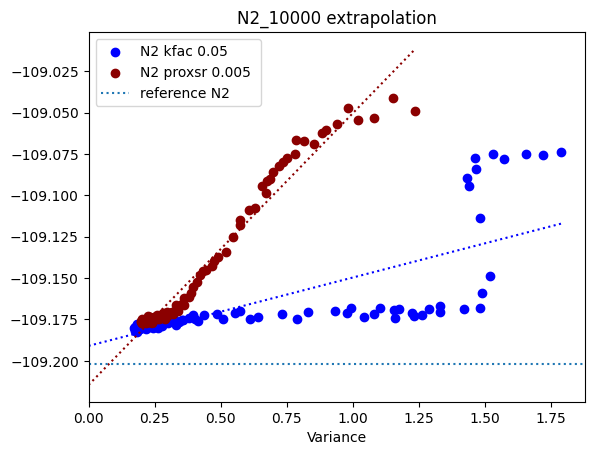

In [4]:
extrapolate(False)
#plt.ylim(bottom=-2.030)

100000
100000
100000
100000


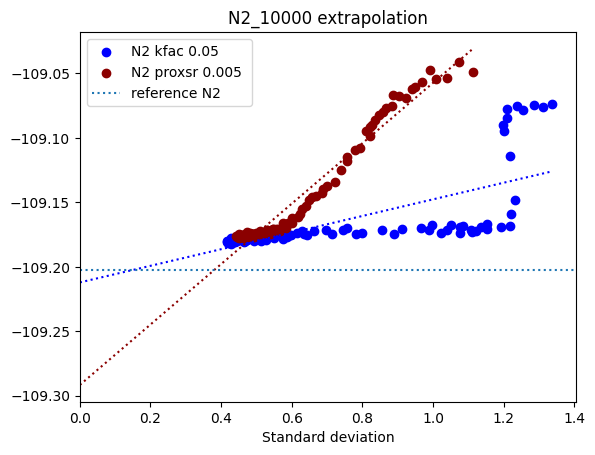

In [5]:
extrapolate(True)
#plt.ylim(bottom=-2.030)